# IonQ Qiskit Provider Example

This notebook will walk you through a basic example of using an IonQ backend with Qiskit

### Setup

In [20]:
# import packages
import sys, os
from pathlib import Path
from qiskit import QuantumCircuit
from qiskit.compiler import assemble
from qiskit.visualization import plot_histogram

sys.path.append("/Users/coleman/dev/qiskit-ionq-provider/qiskit/providers/")
from ionq import IonQ
from ionq.constants import JOB_FINAL_STATES

In [21]:
# save account credentials. 
# Note that you will need an IonQ API key to run this notebook. 
# If you don't have one please reach out via our partnerships page: https://ionq.com/get-started#partnerships
IonQ.save_account("H8bS1SV8HxhW0p3ft0H7ESb0wAN6mnbI", url="https://api.ionq.co/v0.1/")

# You only need to save your account credentials once; after that you can use the load_account method.
# IonQ.load_account()

# If you would like to ephemerally enable an account without saving the credentials to disk, use enable_account
# IonQ.enable_account("api-token-here")

## Build a circuit

Circuit building and visualization should feel nearly identical to building a circuit using any other backend. 

There are only a few things to note: IonQ backends do not allow arbitrary unitaries, barriers, mid-circuit resets or measurements, or multi-experiment jobs. In practice, this means using `barrier`, `reset`, `u1`, `u2`, `u3`, `cu1`, `cu2`, or `cu3` gates will throw an exception on submission, as will measuring mid-circuit, and submmitting jobs with multiple experiments.

In [22]:
# initialize the quantum circuit object with a quantum register length two and a classical register length two
qc = QuantumCircuit(2,2)

# add gates — here we're creating a simple bell pair
qc.h(0)
qc.cnot(0,1)
qc.measure(0,0)
qc.measure(1,1)

# draw the circuit to make sure it's what we expect
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Run on an IonQ Backend

In [23]:
# view list of available backends
IonQ.backends()

[<IonQBackend('ionq_simulator') from <ionq.ionq_provider.IonQProvider object at 0x12dc9dd60>()>,
 <IonQBackend('ionq_qpu') from <ionq.ionq_provider.IonQProvider object at 0x12dc9dd60>()>]

In [24]:
# load backend by using the get_backend method
backend = IonQ.get_backend("ionq_simulator")

In [25]:
# assemble the circuit. providing the backend at this point is optional
qobj = assemble(qc, shots=100)

In [26]:
# submit the qobj
job = backend.run(qobj)

In [28]:
# poll for status and show result when complete 
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job.queue_position()}')
    time.sleep(1)
    job_status = job.status()
    
result = job.result()

In [31]:
#get counts
counts = result.get_counts()

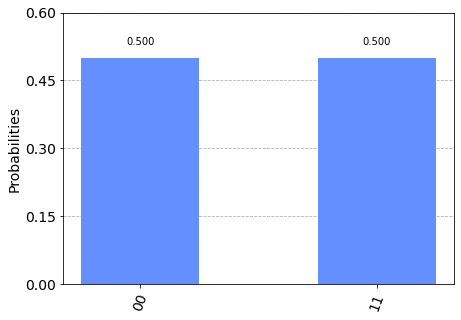

In [33]:
#visualize counts
plot_histogram(counts)

## Retrieve previously-run jobs

You can use the `backend.retrieve_job(job_id)` method to get jobs that you've previously run by their ID. be sure that you run the cell that defines backend above so that it's defined. 

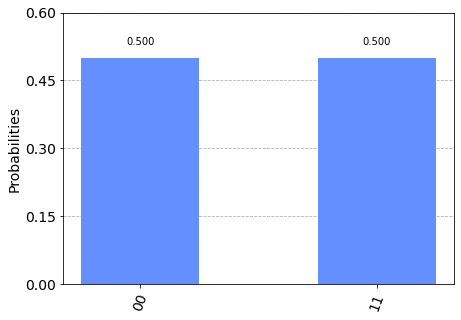

In [43]:
# Retrieve with job id. You can get this from a submitted job with the job_id() method.
retrieved = backend.retrieve_job("job id") 
counts = retrieved.result().get_counts()
plot_histogram(counts)